# Pseudo Labeling

## fusion model

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
import pandas as pd
import numpy as np
from pathlib import Path
from tqdm import tqdm
import shutil

PATH = Path.cwd().parents[1]

import sys
sys.path.append(str(PATH))

from backend.utils.models.fusion_data import grouping_data, predict_by_model_fusion
from backend.utils.comparing import plot_confusion_matrix
MODEL_PATH = os.path.join(PATH, 'backend/models')
DATA_PATH = os.path.join(PATH, 'data')
LABELED_PATH = os.path.join(DATA_PATH, 'labeled')
UNLABELED_PATH = os.path.join(DATA_PATH, 'unlabeled')
round_num = 1

2025-08-01 23:04:16.087519: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Test With Groundtruth

In [3]:
feature, ground_df, label_cols = grouping_data(LABELED_PATH, MODEL_PATH, 'groundtruth.csv')

invalid instruction: PUSH30
invalid instruction: PUSH16
invalid instruction: PUSH30
invalid instruction: PUSH24
invalid instruction: PUSH30
invalid instruction: PUSH16
invalid instruction: PUSH15
invalid instruction: PUSH13
invalid instruction: PUSH25
invalid instruction: PUSH16
invalid instruction: PUSH13
invalid instruction: PUSH25
invalid instruction: PUSH21
invalid instruction: PUSH16
invalid instruction: PUSH15
invalid instruction: PUSH19
invalid instruction: PUSH29
invalid instruction: PUSH26
invalid instruction: PUSH20
invalid instruction: PUSH17
invalid instruction: PUSH16
invalid instruction: PUSH20
invalid instruction: PUSH13
invalid instruction: PUSH13
invalid instruction: PUSH13
invalid instruction: PUSH24
invalid instruction: PUSH27
invalid instruction: PUSH32
invalid instruction: PUSH29
Extracting timeline features: 100%|██████████| 69/69 [00:01<00:00, 46.66it/s] 


============== Threshold: 0.5 ==============
              precision    recall  f1-score   support

        Mint       0.87      1.00      0.93        20
        Leak       1.00      1.00      1.00         9
       Limit       0.60      1.00      0.75        30

   micro avg       0.72      1.00      0.84        59
   macro avg       0.82      1.00      0.89        59
weighted avg       0.75      1.00      0.85        59
 samples avg       0.54      0.61      0.56        59



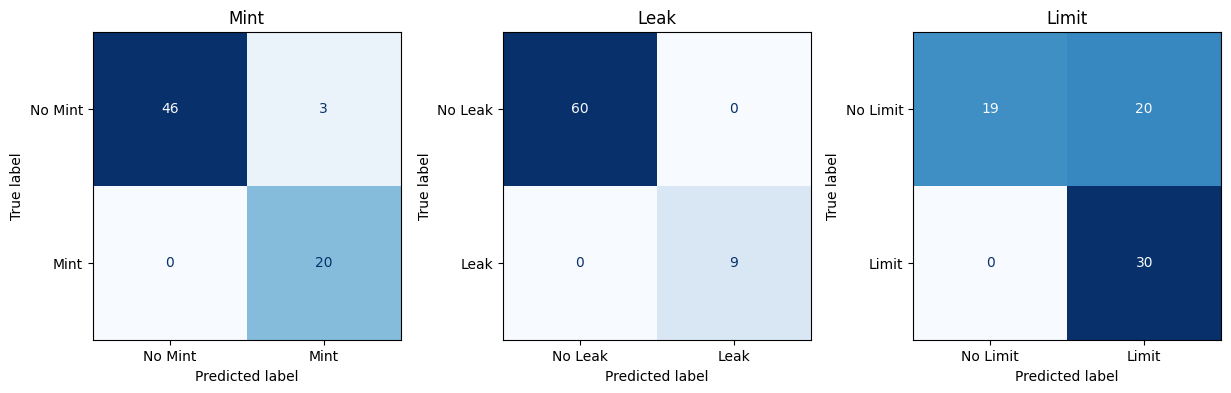

============== Threshold: 0.6 ==============
              precision    recall  f1-score   support

        Mint       0.86      0.95      0.90        20
        Leak       1.00      1.00      1.00         9
       Limit       0.97      1.00      0.98        30

   micro avg       0.94      0.98      0.96        59
   macro avg       0.94      0.98      0.96        59
weighted avg       0.94      0.98      0.96        59
 samples avg       0.59      0.60      0.59        59



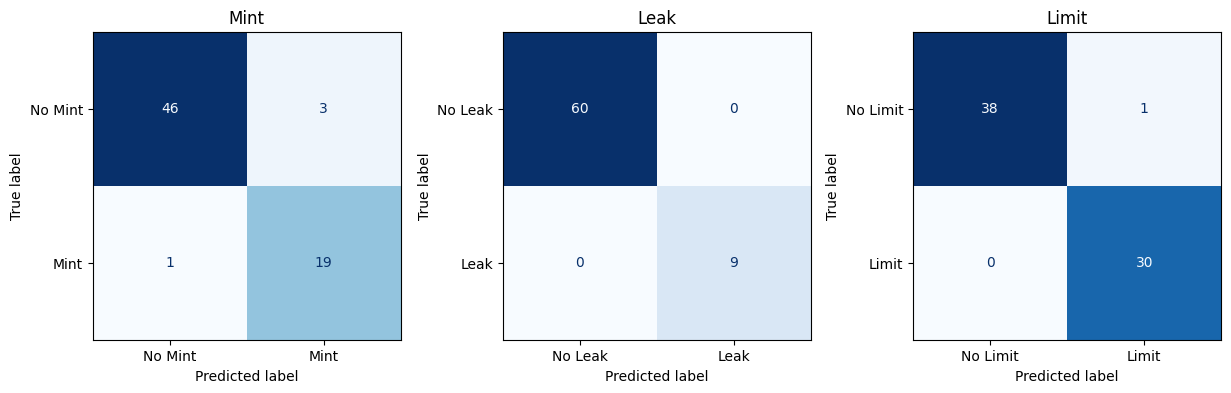

============== Threshold: 0.7 ==============
              precision    recall  f1-score   support

        Mint       0.86      0.95      0.90        20
        Leak       1.00      1.00      1.00         9
       Limit       0.97      0.93      0.95        30

   micro avg       0.93      0.95      0.94        59
   macro avg       0.94      0.96      0.95        59
weighted avg       0.94      0.95      0.94        59
 samples avg       0.56      0.57      0.56        59



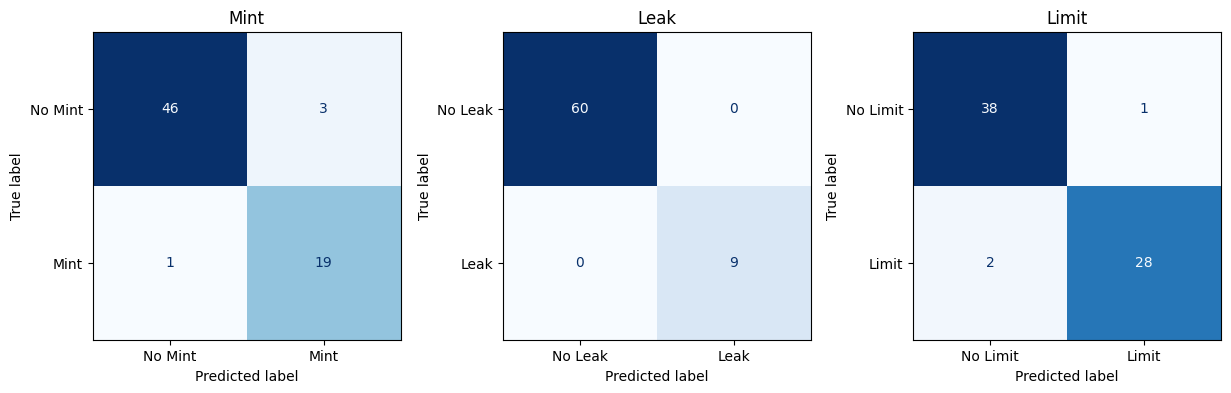

============== Threshold: 0.7999999999999999 ==============
              precision    recall  f1-score   support

        Mint       1.00      0.95      0.97        20
        Leak       1.00      0.89      0.94         9
       Limit       1.00      0.87      0.93        30

   micro avg       1.00      0.90      0.95        59
   macro avg       1.00      0.90      0.95        59
weighted avg       1.00      0.90      0.95        59
 samples avg       0.58      0.55      0.56        59



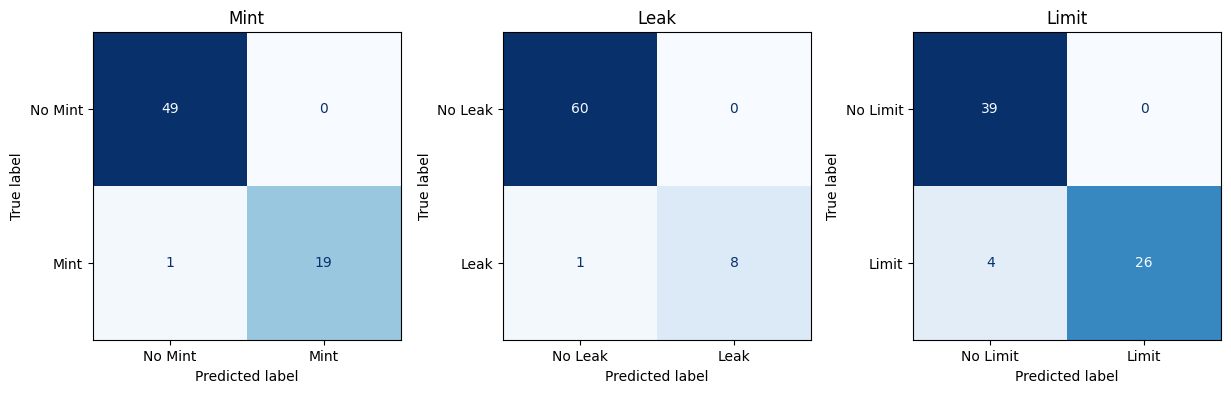

============== Threshold: 0.8999999999999999 ==============
              precision    recall  f1-score   support

        Mint       1.00      0.80      0.89        20
        Leak       1.00      0.78      0.88         9
       Limit       1.00      0.73      0.85        30

   micro avg       1.00      0.76      0.87        59
   macro avg       1.00      0.77      0.87        59
weighted avg       1.00      0.76      0.87        59
 samples avg       0.49      0.47      0.48        59



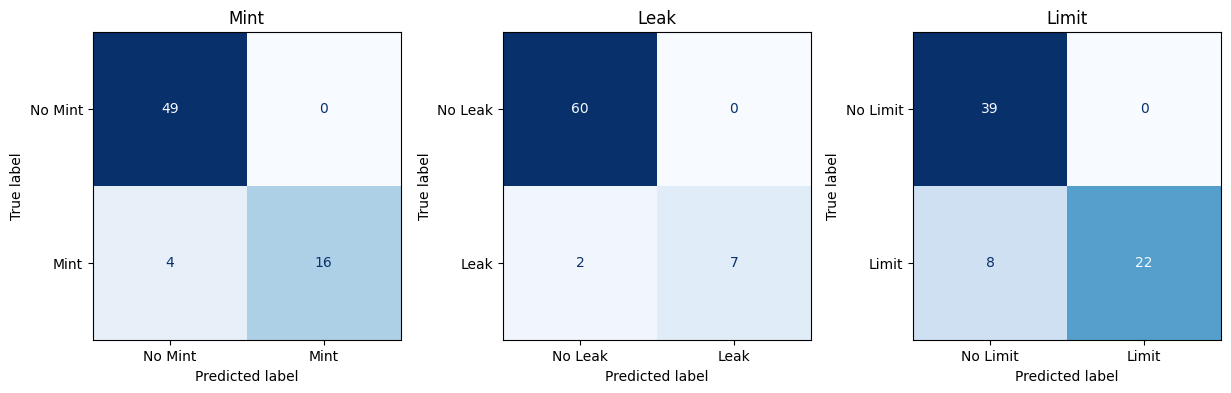

============== Threshold: 0.9999999999999999 ==============
              precision    recall  f1-score   support

        Mint       1.00      0.80      0.89        20
        Leak       1.00      0.78      0.88         9
       Limit       1.00      0.73      0.85        30

   micro avg       1.00      0.76      0.87        59
   macro avg       1.00      0.77      0.87        59
weighted avg       1.00      0.76      0.87        59
 samples avg       0.49      0.47      0.48        59



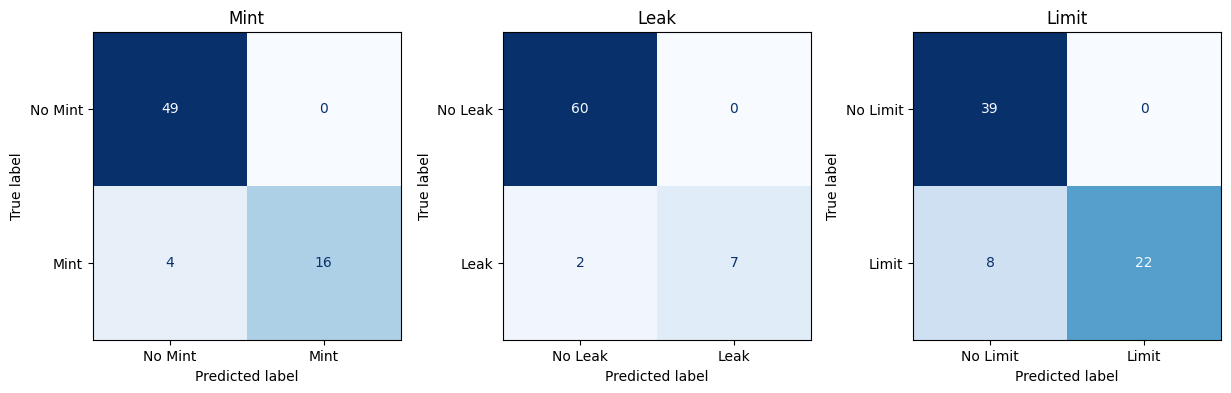

============== Threshold: 1.0999999999999999 ==============
              precision    recall  f1-score   support

        Mint       0.00      0.00      0.00        20
        Leak       0.00      0.00      0.00         9
       Limit       0.00      0.00      0.00        30

   micro avg       0.00      0.00      0.00        59
   macro avg       0.00      0.00      0.00        59
weighted avg       0.00      0.00      0.00        59
 samples avg       0.00      0.00      0.00        59



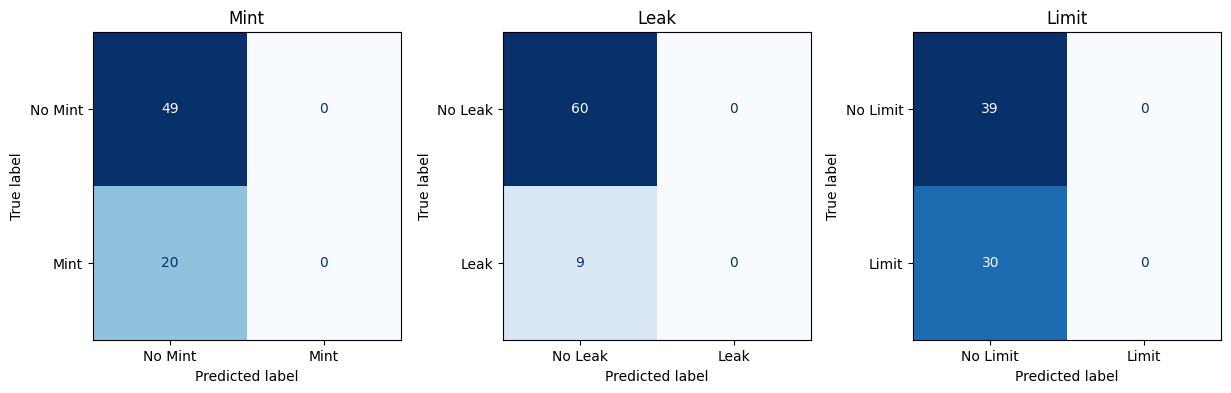

In [4]:
for threshold in np.arange(0.5, 1.1, 0.1):
    print(f"============== Threshold: {threshold} ==============")
    preds_df = predict_by_model_fusion(MODEL_PATH, feature, label_cols, threshold)
    preds_df = preds_df.rename(columns={col: f'pred_{col}' for col in label_cols})
    merged_df = pd.merge(preds_df.reset_index(), ground_df.reset_index(), on='Address', how='inner')
    plot_confusion_matrix(merged_df[label_cols], merged_df[[f'pred_{col}' for col in label_cols]], label_cols)


## Test With Unlabelled

In [5]:
feature, ground_df, label_cols = grouping_data(UNLABELED_PATH, MODEL_PATH, 'groundtruth.csv')

invalid instruction: PUSH30
invalid instruction: PUSH28
invalid instruction: PUSH30
invalid instruction: PUSH17
invalid instruction: PUSH31
invalid instruction: PUSH14
invalid instruction: PUSH28
invalid instruction: PUSH30
invalid instruction: PUSH24
invalid instruction: PUSH27
invalid instruction: PUSH30
invalid instruction: PUSH27
invalid instruction: PUSH23
invalid instruction: PUSH8
invalid instruction: PUSH17
invalid instruction: PUSH8
invalid instruction: PUSH5
invalid instruction: PUSH10
invalid instruction: PUSH32
invalid instruction: PUSH23
invalid instruction: PUSH17
invalid instruction: PUSH19
invalid instruction: PUSH32
invalid instruction: PUSH27
invalid instruction: PUSH29
invalid instruction: PUSH31
invalid instruction: PUSH26
invalid instruction: PUSH32
invalid instruction: PUSH29
invalid instruction: PUSH27
invalid instruction: PUSH18
invalid instruction: PUSH28
invalid instruction: PUSH29
invalid instruction: PUSH27
invalid instruction: PUSH27
invalid instruction: PU

Skipping 0x6ce8b8eed077f9b49c1fa684008ebb7562bb41ad: invalid literal for int() with base 10: ''


Extracting timeline features:  39%|███▉      | 34/87 [00:00<00:00, 91.02it/s]

Skipping 0x36b14bae0989f65f80892b99a55378d3e1a80c81: invalid literal for int() with base 10: ''
Skipping 0xdd007278b667f6bef52fd0a4c23604aa1f96039a: invalid literal for int() with base 10: ''
Skipping 0x4e7a34c6c29a4741858a7ec5622cd8be21b0351b: invalid literal for int() with base 10: ''
Skipping 0xc310755f88145cabcaa06c714cd668b5465dceaa: invalid literal for int() with base 10: ''


Extracting timeline features: 100%|██████████| 87/87 [00:00<00:00, 123.50it/s]

Skipping 0xff1560afef58be59b11c72734ad1d89db63e4e71: invalid literal for int() with base 10: ''
Skipping 0xf1afddbed214dba82cb98d46ad0a96e643f7f6f6: invalid literal for int() with base 10: ''
Skipping 0x0290ea3c728981725689187763f6c63a68e192b8: invalid literal for int() with base 10: ''
Skipping 0xb9aac097f4dadcd6f06761eb470346415ef28d5a: invalid literal for int() with base 10: ''
Skipping 0x76bc9e61a1904b82cbf70d1fd9c0f8a120483bbb: invalid literal for int() with base 10: ''


In [6]:
preds_df = predict_by_model_fusion(MODEL_PATH, feature, label_cols, 0.6)
preds_df = preds_df.rename(columns={col: f'pred_{col}' for col in label_cols})
merged_df = pd.merge(preds_df.reset_index(), ground_df.reset_index(), on='Address', how='inner')
merged_df = merged_df[['Address', 'pred_Mint', 'Leak', 'pred_Limit']].rename(columns={'pred_Mint': 'Mint', 'pred_Limit': 'Limit'}).set_index('Address')
merged_df

,Mint,Leak,Limit
Address,,,
0x10cc060f6f9b2e5dcdb23f1361e4b368a7daec73,1,1,1
0x36b14bae0989f65f80892b99a55378d3e1a80c81,1,1,0
0x32680c305b2e753f0c9c8dfa6e36ba36c68e0801,0,1,0
0xac4bf53936aedacbfd02c334be90bf2c79f063b9,0,1,1
0x74a30d0ca07771fbd450ef4ded357e2e688ee59f,0,1,0
...,...,...,...
0xe99ddae9181957e91b457e4c79a1b577e55a5742,0,0,0
0x7723737d529c2b42e4d218ad7e0a20354fbc7071,1,0,0
0x6e5db36f85492b20153eb8165e19dea1387345df,0,1,0


In [7]:
ground_df = pd.read_csv(os.path.join(LABELED_PATH, 'groundtruth.csv'), index_col=0)

In [8]:
new_ground_df = pd.concat([ground_df, merged_df]).reset_index()
new_ground_df

,Address,Mint,Leak,Limit
0,0x93023f1d3525e273f291b6f76d2f5027a39bf302,1,0,1
1,0x2753dce37a7edb052a77832039bcc9aa49ad8b25,0,0,1
2,0x94b7d24552933f50a5a5705c446528806dcea381,0,0,0
3,0xe0b9d4146aad6936cbfcbe4dae47e34aab96b093,0,0,0
4,0x10f6f2b97f3ab29583d9d38babf2994df7220c21,1,0,1
...,...,...,...,...
151,0xe99ddae9181957e91b457e4c79a1b577e55a5742,0,0,0
152,0x7723737d529c2b42e4d218ad7e0a20354fbc7071,1,0,0
153,0x6e5db36f85492b20153eb8165e19dea1387345df,0,1,0
154,0xe9fc0c55f9f3a38c0e972d6444273ebdcc7aa46f,0,1,0


In [10]:
ground_df.to_csv(os.path.join(DATA_PATH, f'logs/groundtruth-{round_num-1}.csv'))

In [13]:
new_ground_df.to_csv(os.path.join(LABELED_PATH, 'groundtruth.csv'), index=False)

In [12]:
HEX_PATH = os.path.join(UNLABELED_PATH, 'hex')
SOL_PATH = os.path.join(UNLABELED_PATH, 'sol')
TXN_PATH = os.path.join(UNLABELED_PATH, 'txn')

for src_file in tqdm(list(Path(HEX_PATH).glob('*.hex'))):
    address = src_file.stem.lower()
    shutil.move(src_file, os.path.join(LABELED_PATH, f'hex/{address}.hex'))

for src_file in tqdm(list(Path(SOL_PATH).glob('*.sol'))):
    address = src_file.stem.lower()
    shutil.move(src_file, os.path.join(LABELED_PATH, f'sol/{address}.sol'))

for src_file in tqdm(list(Path(TXN_PATH).glob('*.json'))):
    address = src_file.stem.lower()
    shutil.move(src_file, os.path.join(LABELED_PATH, f'txn/{address}.json'))

100%|██████████| 87/87 [00:00<00:00, 2627.93it/s]
